In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv("train_users_2.csv")
df_test = pd.read_csv('test_users.csv')
df_age_gender = pd.read_csv('age_gender_bkts.csv')
df_sessions = pd.read_csv('sessions.csv')

In [38]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [40]:
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [42]:
X_train = df_train
X_test = df_test

df=pd.concat((X_train, X_test), axis=0, ignore_index=True)
df.shape

C:\Users\baker\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(275547, 16)

In [43]:
print(df_test.shape[0], "Users in Test", df_train.shape[0], "Users in train")

print("Test Users + Training Users = ", df_test.shape[0] + df_train.shape[0])

62096 Users in Test 213451 Users in train
Test Users + Training Users =  275547


In [44]:
# missing data

df.gender.replace('-unknown-', np.nan, inplace=True)
df.first_browser.replace('-unknown-', np.nan, inplace=True)

df.drop('date_first_booking', axis=1, inplace=True)

df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
first_affiliate_tracked      6085
first_browser               44394
first_device_type               0
gender                     129480
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [45]:
df.loc[df['age']>1000]['age'].describe()
df.loc[df['age']<17]['age'].describe()
df['age'].describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [46]:
df_with_year = df['age'] > 1000
df.loc[df_with_year, 'age'] = 2015 - df.loc[df_with_year, 'age']
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 17, 'age'] = np.nan
df['age'].describe()

count    155848.000000
mean         36.038384
std          11.587113
min          17.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

In [47]:
df.loc[df.age.isnull(), 'age']=df.age.mean()
df['age'].describe()

count    275547.000000
mean         36.038384
std           8.714198
min          17.000000
25%          32.000000
50%          36.038384
75%          36.038384
max          95.000000
Name: age, dtype: float64

In [48]:
#Split Date Acount Create

dac = np.vstack(
    df.date_account_created.astype(str).apply(
        lambda x: list(map(int, x.split('-')))
    ).values
)
df['dac_year'] = dac[:, 0]
df['dac_month'] = dac[:, 1]
df['dac_day'] = dac[:, 2]
df = df.drop(['date_account_created'], axis=1)
df.head()

,affiliate_channel,affiliate_provider,age,country_destination,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active,dac_year,dac_month,dac_day
0,direct,direct,36.038384,NDF,untracked,Chrome,Mac Desktop,NaN,gxn3p5htnn,en,Web,0,facebook,20090319043255,2010,6,28
1,seo,google,38.000000,NDF,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809,2011,5,25
2,direct,direct,56.000000,US,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247,2010,9,28
3,direct,direct,42.000000,other,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129,2011,12,5
4,direct,direct,41.000000,US,untracked,Chrome,Mac Desktop,NaN,87mebub9p4,en,Web,0,basic,20091208061105,2010,9,14


In [63]:
tfa = np.vstack(
    df.timestamp_first_active.astype(str).apply(
        lambda x: list(map(int, [x[:4], x[4:6], x[6:8],
                                 x[8:10], x[10:12],
                                 x[12:14]]))
    ).values
)
df['tfa_year'] = tfa[:, 0]
df['tfa_month'] = tfa[:, 1]
df['tfa_day'] = tfa[:, 2]
df = df.drop(['timestamp_first_active'], axis=1)

C:\Users\baker\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Percentage of gender')

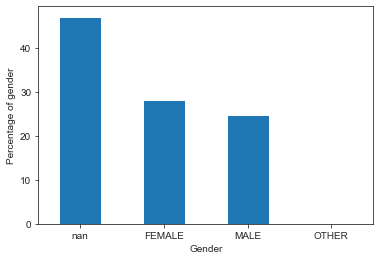

In [49]:
# percentage of gender
gender = df.gender.value_counts(dropna = False) / len(df) * 100
gender.plot('bar', rot = 0)
plt.xlabel('Gender')
plt.ylabel('Percentage of gender')

C:\Users\baker\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Percentage of signup_method')

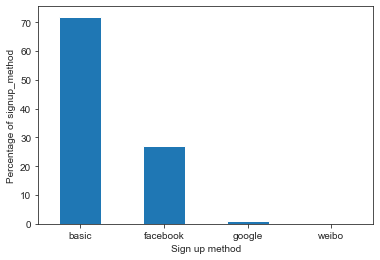

In [50]:
# percentage of users using different signup_method
signup_method = df.signup_method.value_counts(dropna = False) / len(df) * 100
signup_method.plot('bar', rot = 0)
plt.xlabel('Sign up method')
plt.ylabel('Percentage of signup_method')

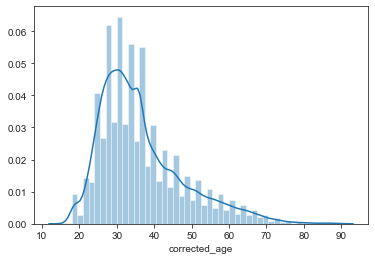

In [51]:
# age distributions
df_train['corrected_age']=df_train['age'].apply(lambda x : 36 if x>90 or x<10 else x)
sns.distplot(df_train.corrected_age.dropna())

C:\Users\baker\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Percentage of booking')

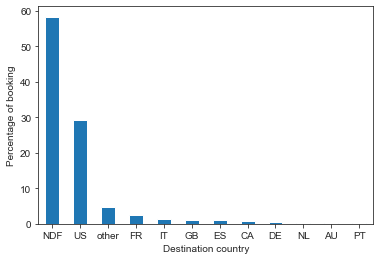

In [52]:
# percentage of people going to different countries
des_countries = df_train.country_destination.value_counts(dropna = False) / len(df_train) * 100
des_countries.plot('bar', rot = 0)
plt.xlabel('Destination country')
plt.ylabel('Percentage of booking')

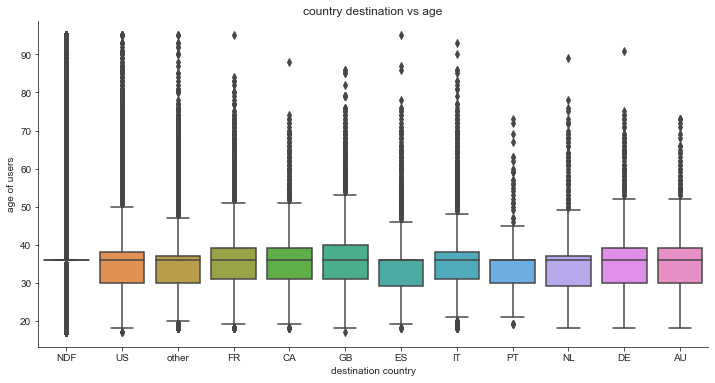

In [53]:
# country destination vs age
plt.figure(figsize=(12,6))
sns.boxplot(y='age', x='country_destination', data=df)
plt.xlabel('destination country')
plt.ylabel('age of users')
plt.title('country destination vs age')
sns.despine()

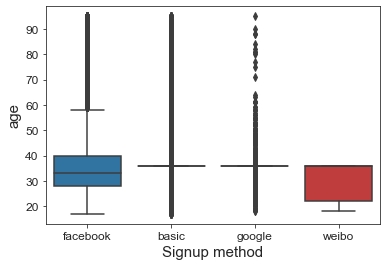

In [54]:
# relevance between age and signup method
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
sns.boxplot(y='age' , x='signup_method',data=df)
plt.xlabel('Signup method', size=15)
plt.ylabel('age', size=15)
plt.tick_params(labelsize=12)
#sns.despine()

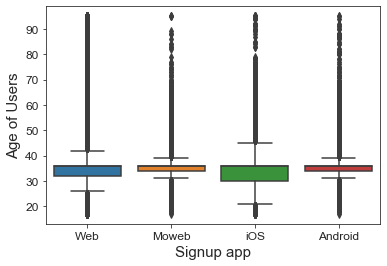

In [55]:
# relevence between age and signup app
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
sns.boxplot(y='age' , x='signup_app',data=df)
plt.xlabel('Signup app',size=15)
plt.ylabel('Age of Users', size=15)
plt.tick_params(labelsize=12)
#sns.despine()

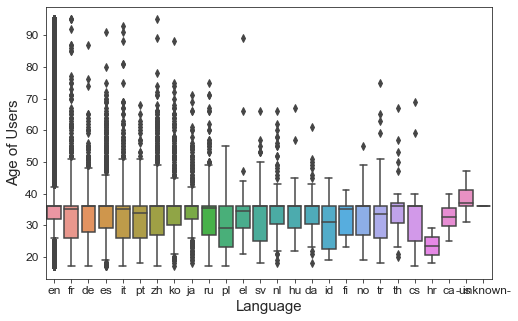

In [56]:
#relevence between age and language
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.boxplot(y='age' , x='language',data=df)
plt.xlabel('Language', size=15)
plt.ylabel('Age of Users', size=15)
plt.tick_params(labelsize=12)
#sns.despine()

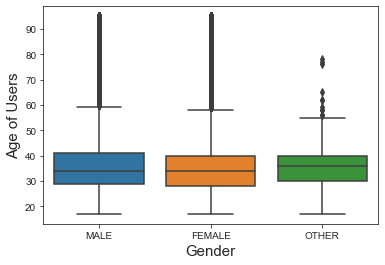

In [57]:
# relevance between age and gender
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
sns.boxplot(y='age' , x='gender',data=df)
plt.xlabel('Gender', size=15)
plt.ylabel('Age of Users', size=15)
plt.tick_params(labelsize=10)
#sns.despine()

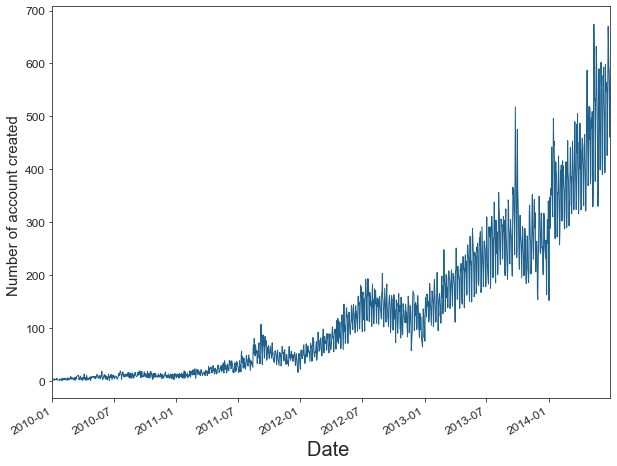

In [58]:
# chart for number of account created
df_train['date_account_created_new'] = pd.to_datetime(df_train['date_account_created'])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
df_train.date_account_created_new.value_counts().plot(kind='line', linewidth=1, color='#1F618D')
plt.xlabel('Date ', size=20)
plt.ylabel('Number of account created ', size=15)
plt.tick_params(labelsize=12)
#sns.despine()

In [59]:
#Age and Gender

df.groupby('gender').age.agg(['min','max','mean','count'])

,min,max,mean,count
gender,,,,
FEMALE,17.0,95.0,35.731417,77524
MALE,17.0,95.0,36.248766,68209
OTHER,17.0,78.0,35.904869,334


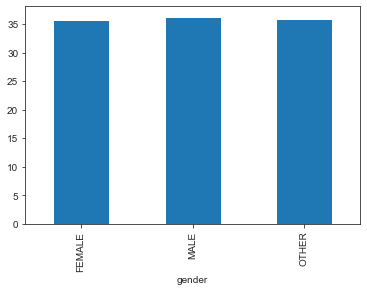

In [60]:
df.groupby('gender').age.mean().plot(kind='bar')

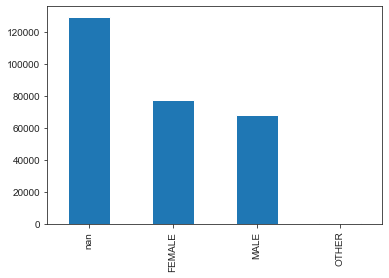

In [61]:
df.gender.value_counts(dropna=False).plot(kind='bar')

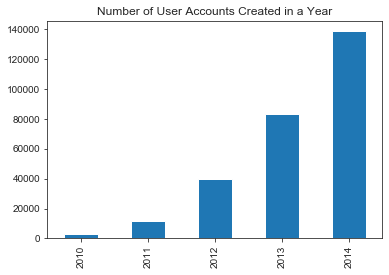

In [62]:
#Yearly growth of number of accounts created

df.dac_year.value_counts(sort=False).plot(kind='bar', title='Number of User Accounts Created in a Year')


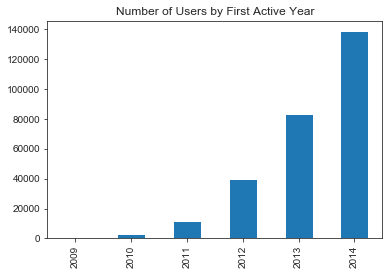

In [64]:
df.tfa_year.value_counts(sort=False).plot(kind='bar', title = 'Number of Users by First Active Year')

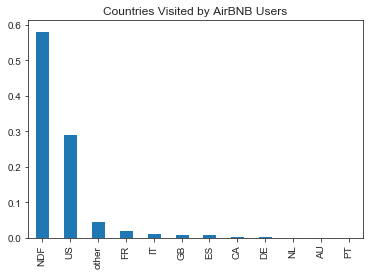

In [67]:
#Countries visited by Air BnB Users

df.country_destination.value_counts(normalize=True).plot(kind='bar',title='Countries Visited by AirBNB Users')

In [68]:
#Number of Users by Language

df.language.value_counts(sort=True)

en           265538
zh             2634
fr             1508
es             1174
ko             1116
de              977
it              633
ru              508
ja              345
pt              322
sv              176
nl              134
tr               92
pl               75
da               75
no               51
cs               49
el               30
th               28
hu               25
id               23
fi               20
ca                6
is                5
hr                2
-unknown-         1
Name: language, dtype: int64

In [69]:
#Note no null data now left
print(df.isnull().sum())

affiliate_channel               0
affiliate_provider              0
age                             0
country_destination         62096
first_affiliate_tracked      6085
first_browser               44394
first_device_type               0
gender                     129480
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
dac_year                        0
dac_month                       0
dac_day                         0
tfa_year                        0
tfa_month                       0
tfa_day                         0
dtype: int64
